In [1]:
from keras.layers import Dense, Flatten
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
base_dir = "dataset/grayscale/224/"
folders = glob(base_dir + "/*")

print("Total class:", len(folders))
os.listdir(base_dir)

Total class: 3


['224_gray_bopeng', '224_gray_jerawat', '224_gray_komedo']

In [5]:
file_name = []
tag = []
full_path = []

for path, subdirs, files in os.walk(base_dir):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(path.split("\\")[-1])
        file_name.append(name)

In [6]:
df = pd.DataFrame({"path": full_path, "file_name": file_name, "tag": tag})
df.groupby(["tag"]).size()

tag
dataset/grayscale/224/224_gray_bopeng     750
dataset/grayscale/224/224_gray_jerawat    750
dataset/grayscale/224/224_gray_komedo     750
dtype: int64

In [7]:
df

,path,file_name,tag
0,dataset/grayscale/224/224_gray_bopeng\b_gray_0...,b_gray_0.jpg,dataset/grayscale/224/224_gray_bopeng
1,dataset/grayscale/224/224_gray_bopeng\b_gray_1...,b_gray_1.jpg,dataset/grayscale/224/224_gray_bopeng
2,dataset/grayscale/224/224_gray_bopeng\b_gray_1...,b_gray_10.jpg,dataset/grayscale/224/224_gray_bopeng
3,dataset/grayscale/224/224_gray_bopeng\b_gray_1...,b_gray_100.jpg,dataset/grayscale/224/224_gray_bopeng
4,dataset/grayscale/224/224_gray_bopeng\b_gray_1...,b_gray_101.jpg,dataset/grayscale/224/224_gray_bopeng
...,...,...,...
2245,dataset/grayscale/224/224_gray_komedo\k_gray_9...,k_gray_95.jpg,dataset/grayscale/224/224_gray_komedo
2246,dataset/grayscale/224/224_gray_komedo\k_gray_9...,k_gray_96.jpg,dataset/grayscale/224/224_gray_komedo
2247,dataset/grayscale/224/224_gray_komedo\k_gray_9...,k_gray_97.jpg,dataset/grayscale/224/224_gray_komedo
2248,dataset/grayscale/224/224_gray_komedo\k_gray_9...,k_gray_98.jpg,dataset/grayscale/224/224_gray_komedo


In [8]:
X = df["path"]
y = df["tag"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [9]:
data_train = pd.DataFrame({"path": X_train, "tag": y_train, "set": "train"})
data_val = pd.DataFrame({"path": X_val, "tag": y_val, "set": "valid"} )

In [10]:
print("train_size", len(data_train))
print("valid_size", len(data_val))

train_size 1800
valid_size 450


In [11]:
df_all = data_train.append([data_val]).reset_index(drop=1)
print(df_all.groupby(["set", "tag"]).size(), "\n")

# Cek sample data
df_all

set    tag                                   
train  dataset/grayscale/224/224_gray_bopeng     600
       dataset/grayscale/224/224_gray_jerawat    600
       dataset/grayscale/224/224_gray_komedo     600
valid  dataset/grayscale/224/224_gray_bopeng     150
       dataset/grayscale/224/224_gray_jerawat    150
       dataset/grayscale/224/224_gray_komedo     150
dtype: int64 



,path,tag,set
0,dataset/grayscale/224/224_gray_jerawat\j_gray_...,dataset/grayscale/224/224_gray_jerawat,train
1,dataset/grayscale/224/224_gray_komedo\k_gray_5...,dataset/grayscale/224/224_gray_komedo,train
2,dataset/grayscale/224/224_gray_komedo\k_gray_3...,dataset/grayscale/224/224_gray_komedo,train
3,dataset/grayscale/224/224_gray_jerawat\j_gray_...,dataset/grayscale/224/224_gray_jerawat,train
4,dataset/grayscale/224/224_gray_bopeng\b_gray_7...,dataset/grayscale/224/224_gray_bopeng,train
...,...,...,...
2245,dataset/grayscale/224/224_gray_komedo\k_gray_3...,dataset/grayscale/224/224_gray_komedo,valid
2246,dataset/grayscale/224/224_gray_jerawat\j_gray_...,dataset/grayscale/224/224_gray_jerawat,valid
2247,dataset/grayscale/224/224_gray_komedo\k_gray_5...,dataset/grayscale/224/224_gray_komedo,valid
2248,dataset/grayscale/224/224_gray_bopeng\b_gray_4...,dataset/grayscale/224/224_gray_bopeng,valid


In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [13]:
train_generator = train_datagen.flow_from_dataframe(
        data_train,
        x_col="path",
        y_col="tag",
        target_size=(224, 224),
        class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_dataframe(
        data_val,
        x_col="path",
        y_col="tag",
        target_size=(224, 224),
        class_mode="categorical"
)

Found 1800 validated image filenames belonging to 3 classes.
Found 450 validated image filenames belonging to 3 classes.


## Build Model

In [14]:
IMAGE_SIZE = [224, 224]
mobile_net = MobileNet(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)

In [15]:
for layers in mobile_net.layers:
    layers.trainable = False

In [16]:
x = Flatten()(mobile_net.output)
prediction = Dense(len(folders), activation="softmax")(x)

In [17]:
model = Model(inputs=mobile_net.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [19]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [20]:
my_callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", 
    min_delta=0.001, 
    patience=5,
    verbose=0,
    mode="max",
    restore_best_weights=True
)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=my_callbacks
)

Epoch 1/50
57/57 [==============================] - 37s 623ms/step - loss: 0.8382 - accuracy: 0.8739 - val_loss: 0.1423 - val_accuracy: 0.9689
Epoch 2/50
57/57 [==============================] - 38s 664ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0956 - val_accuracy: 0.9844
Epoch 3/50
57/57 [==============================] - 35s 608ms/step - loss: 0.0051 - accuracy: 0.9972 - val_loss: 0.0817 - val_accuracy: 0.9844
Epoch 4/50
57/57 [==============================] - 35s 623ms/step - loss: 6.5446e-04 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9889
Epoch 5/50
57/57 [==============================] - 45s 800ms/step - loss: 1.2149e-04 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 0.9889
Epoch 6/50
57/57 [==============================] - 54s 943ms/step - loss: 8.5929e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9889
Epoch 7/50
57/57 [==============================] - 52s 917ms/step - loss: 7.2364e-05 - accuracy: 1.0000 - val_loss: 0.0666 - val_

## Model Accuracy

In [22]:
test_loss, test_acc = model.evaluate(valid_generator)
print("\naccuracy:", test_acc, "  loss: ", test_loss)


15/15 [==============================] - 7s 450ms/step - loss: 0.0694 - accuracy: 0.9889

accuracy: 0.9888888597488403   loss:  0.06936151534318924


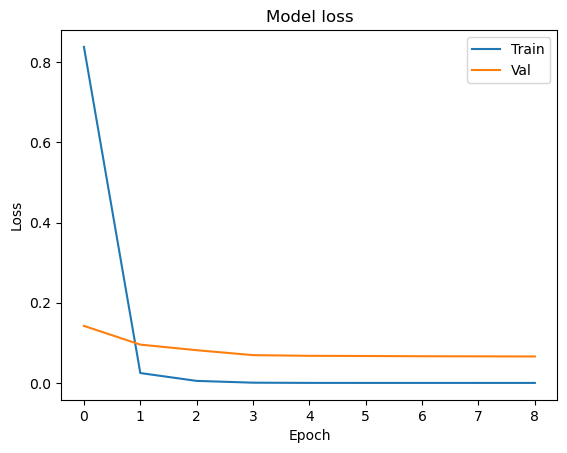

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

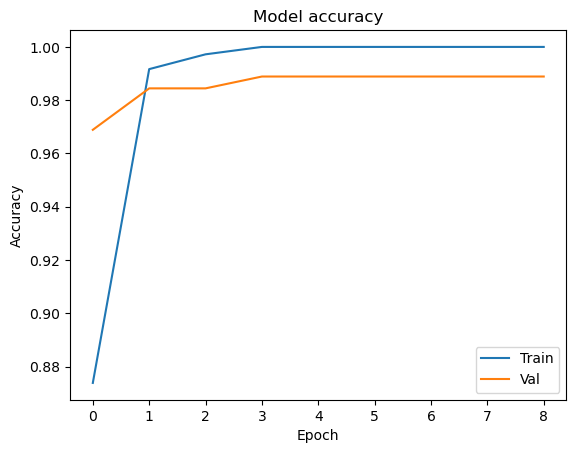

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

## Save Model

In [25]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "model_224"
SAVE_MODEL_NAME = "mobilenet-244-grayscale.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print("Saving Model At {}...".format(save_model_path))
model.save(save_model_path)

Saving Model At model\model_224\mobilenet-244-grayscale.h5...


## Model Evaluate

In [5]:
model_load = load_model('model/model_224/mobilenet-244-grayscale.h5')

In [6]:
image_generator = ImageDataGenerator(rescale=1/255)
test_data = 'testing'
test_image_data = image_generator.flow_from_directory(test_data, target_size=(224, 224), batch_size=60)

Found 60 images belonging to 3 classes.


In [7]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break


Image batch shape:  (60, 224, 224, 3)
Label batch shape:  (60, 3)


In [8]:
predicted_batch = model_load.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

2/2 [==============================] - 1s 461ms/step


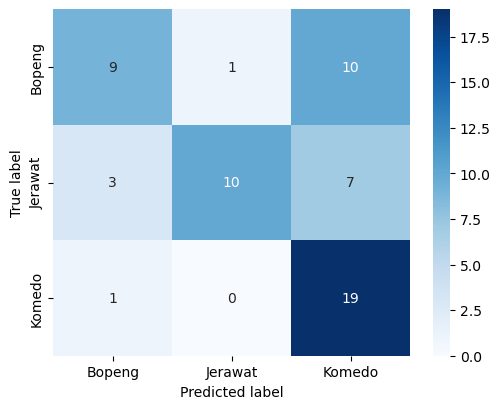

In [9]:
cf_matrix = confusion_matrix(label_id, predicted_id)
cm_df = pd.DataFrame(
    cf_matrix,
    index=["Bopeng", "Jerawat", "Komedo"],
    columns=["Bopeng", "Jerawat", "Komedo"]
)
figure = plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [10]:
faces = ['bopeng', 'jerawat', 'komedo']
classification_metrics = classification_report(label_id, predicted_id, target_names=faces, zero_division=0)
print(classification_metrics)

              precision    recall  f1-score   support

      bopeng       0.69      0.45      0.55        20
     jerawat       0.91      0.50      0.65        20
      komedo       0.53      0.95      0.68        20

    accuracy                           0.63        60
   macro avg       0.71      0.63      0.62        60
weighted avg       0.71      0.63      0.62        60

